# <center> *Country Report* <center/>
## <center> *Date: 02.12.2020* <center/>
## <center> *By: Tal Levi* <center/>

In [1]:
import calendar
import pandas as pd
from analysis.classes import Country
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
country = Country('usa')
df = country.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [3]:
print(country)


Countries name: Usa
Countries id: 1
Continent: North America
Continent id: 1
Population: 331171664
First update: 2020-08-02
Last update: 2020-12-01
Data number of rows: 107
Data number of columns: 18
Columns: 
['scrap_date', 'scrap_time', 'update_time_GMT', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [4]:
df.dtypes

scrap_date         datetime64[ns]
scrap_time                 object
update_time_GMT            object
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object

In [5]:
print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


,null_count
scrap_date,0
scrap_time,0
update_time_GMT,59
Country_id,0
Country,0
Population,0
TotalCases,0
NewCases,1
TotalDeaths,0
NewDeaths,1


In [6]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


,scrap_date,scrap_time,update_time_GMT,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
0,2020-08-02,20:00:00,NaN,1,USA,331171664,4778177,nan,158039,nan,2363229,nan,2256909,18720,14428,477.000,59259593,178939
1,2020-08-08,20:00:00,NaN,1,USA,331203424,5120955,342778.000,164577,6538.000,2620147,256918.000,2336231,18038,15462,497.000,64096129,193525
2,2020-08-12,20:00:00,NaN,1,USA,331224597,5306851,185896.000,167761,3184.000,2756107,135960.000,2382983,17339,16022,506.000,66944595,202112
3,2020-08-16,20:00:00,NaN,1,USA,331245770,5530028,223177.000,172608,4847.000,2904130,148023.000,2453290,17186,16695,521.000,70228171,212012
4,2020-08-17,20:00:00,NaN,1,USA,331251064,5579686,49658.000,173258,650.000,2928179,24049.000,2478249,17237,16844,523.000,71149490,214790


In [7]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


,scrap_date,scrap_time,update_time_GMT,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
102,2020-11-27,23:00:00,20:59:00,1,USA,331790984,13386176,167331.000,270664,1362.000,7892047,56811.000,5223465,24405,40345,816.000,188555876,568297
103,2020-11-28,23:00:00,20:46:00,1,USA,331796277,13577266,191090.000,272076,1412.000,8020995,128948.000,5284195,24467,40920,820.000,190713529,574791
104,2020-11-29,23:00:00,20:51:00,1,USA,331801570,13701880,124614.000,272836,760.000,8085224,64229.000,5343820,24642,41295,822.000,191826213,578135
105,2020-11-30,23:00:00,20:57:00,1,USA,331806864,13871441,169561.000,273924,1088.000,8181759,96535.000,5415758,24814,41806,826.000,193475840,583098
106,2020-12-01,23:00:00,20:55:00,1,USA,331812157,14046293,174852.000,276154,2230.000,8287295,105536.000,5482844,25313,42332,832.000,195816547,590143


### Part Two - Basic Analysis

In [8]:
months_info = country.three_months_info()
months_info

,Year,Month,ActiveCasesAvg,RecoveredSum,DeathsSum,CasesSum,CriticalSum
0,2020,Sep,"2,540,447.345","1,248,280","23,965","1,246,816","418,498"
1,2020,Oct,"2,729,811.067","1,381,695","24,565","1,955,529","461,815"
2,2020,Nov,"4,233,092.600","2,125,846","38,027","4,487,702","650,288"


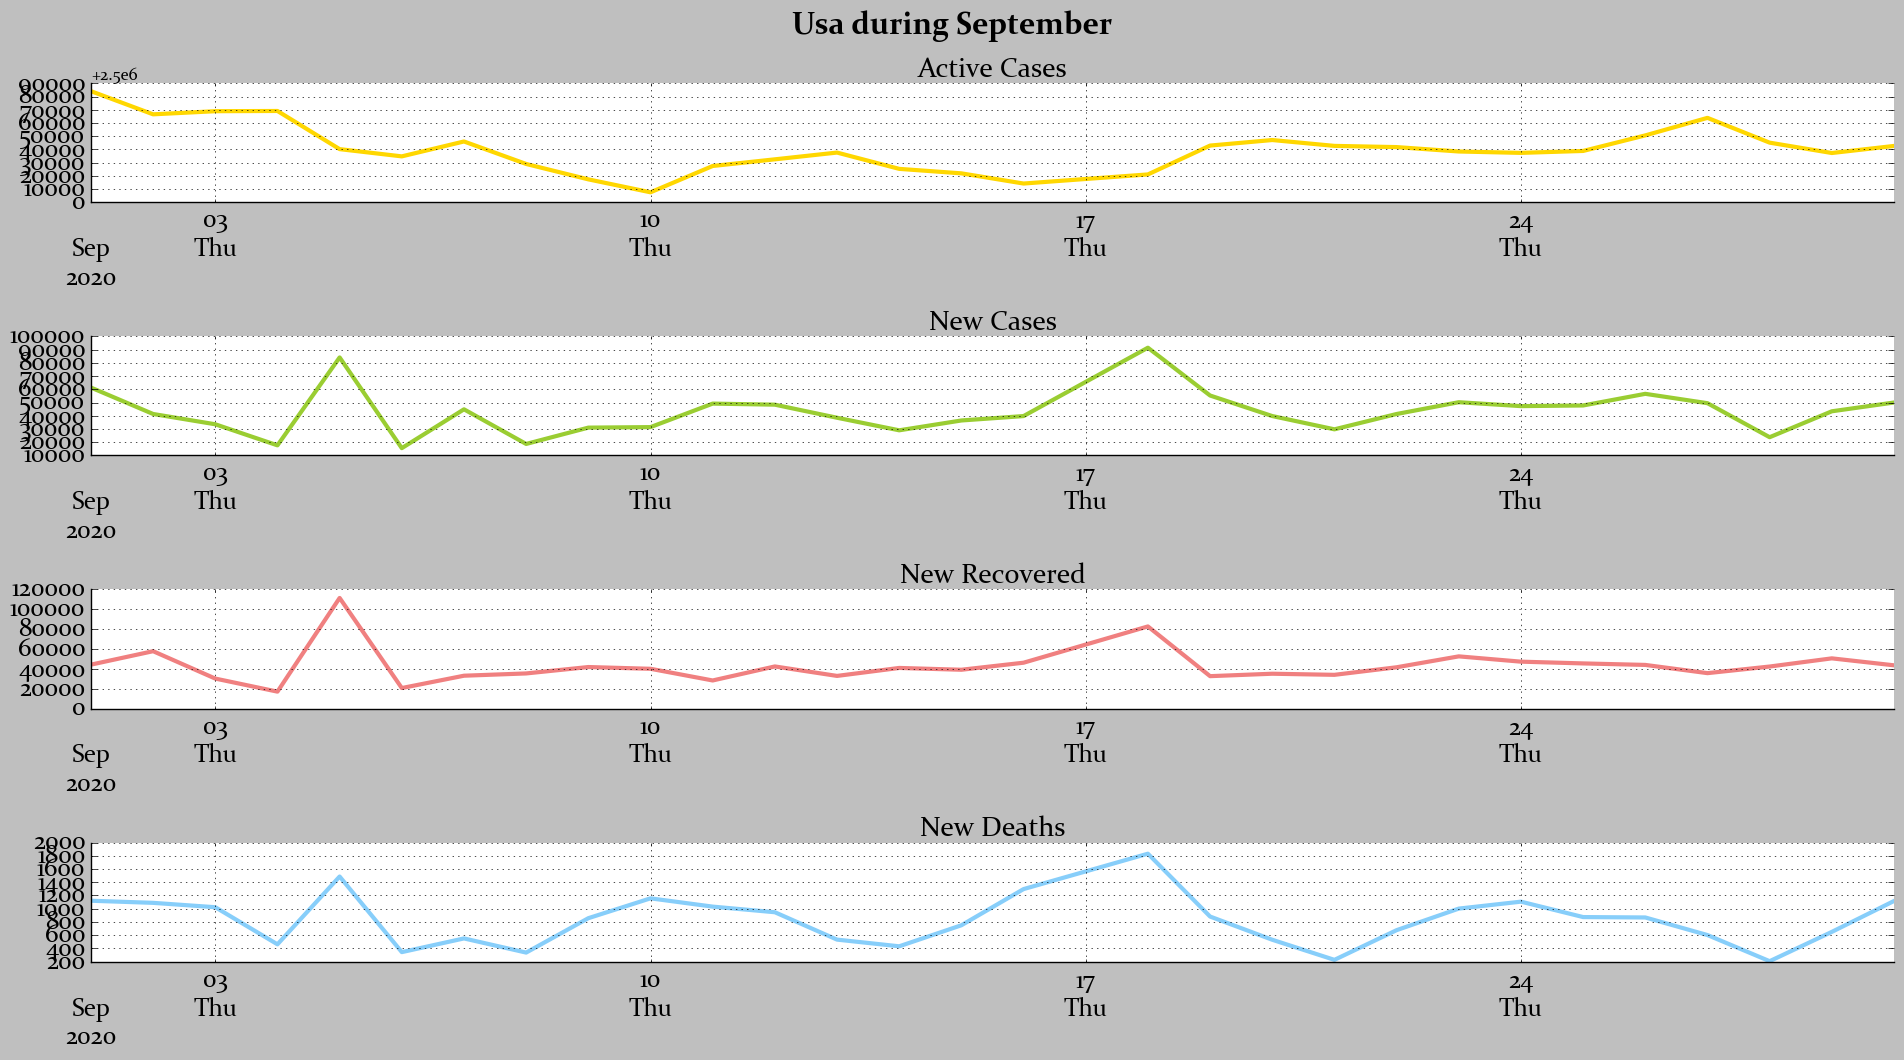

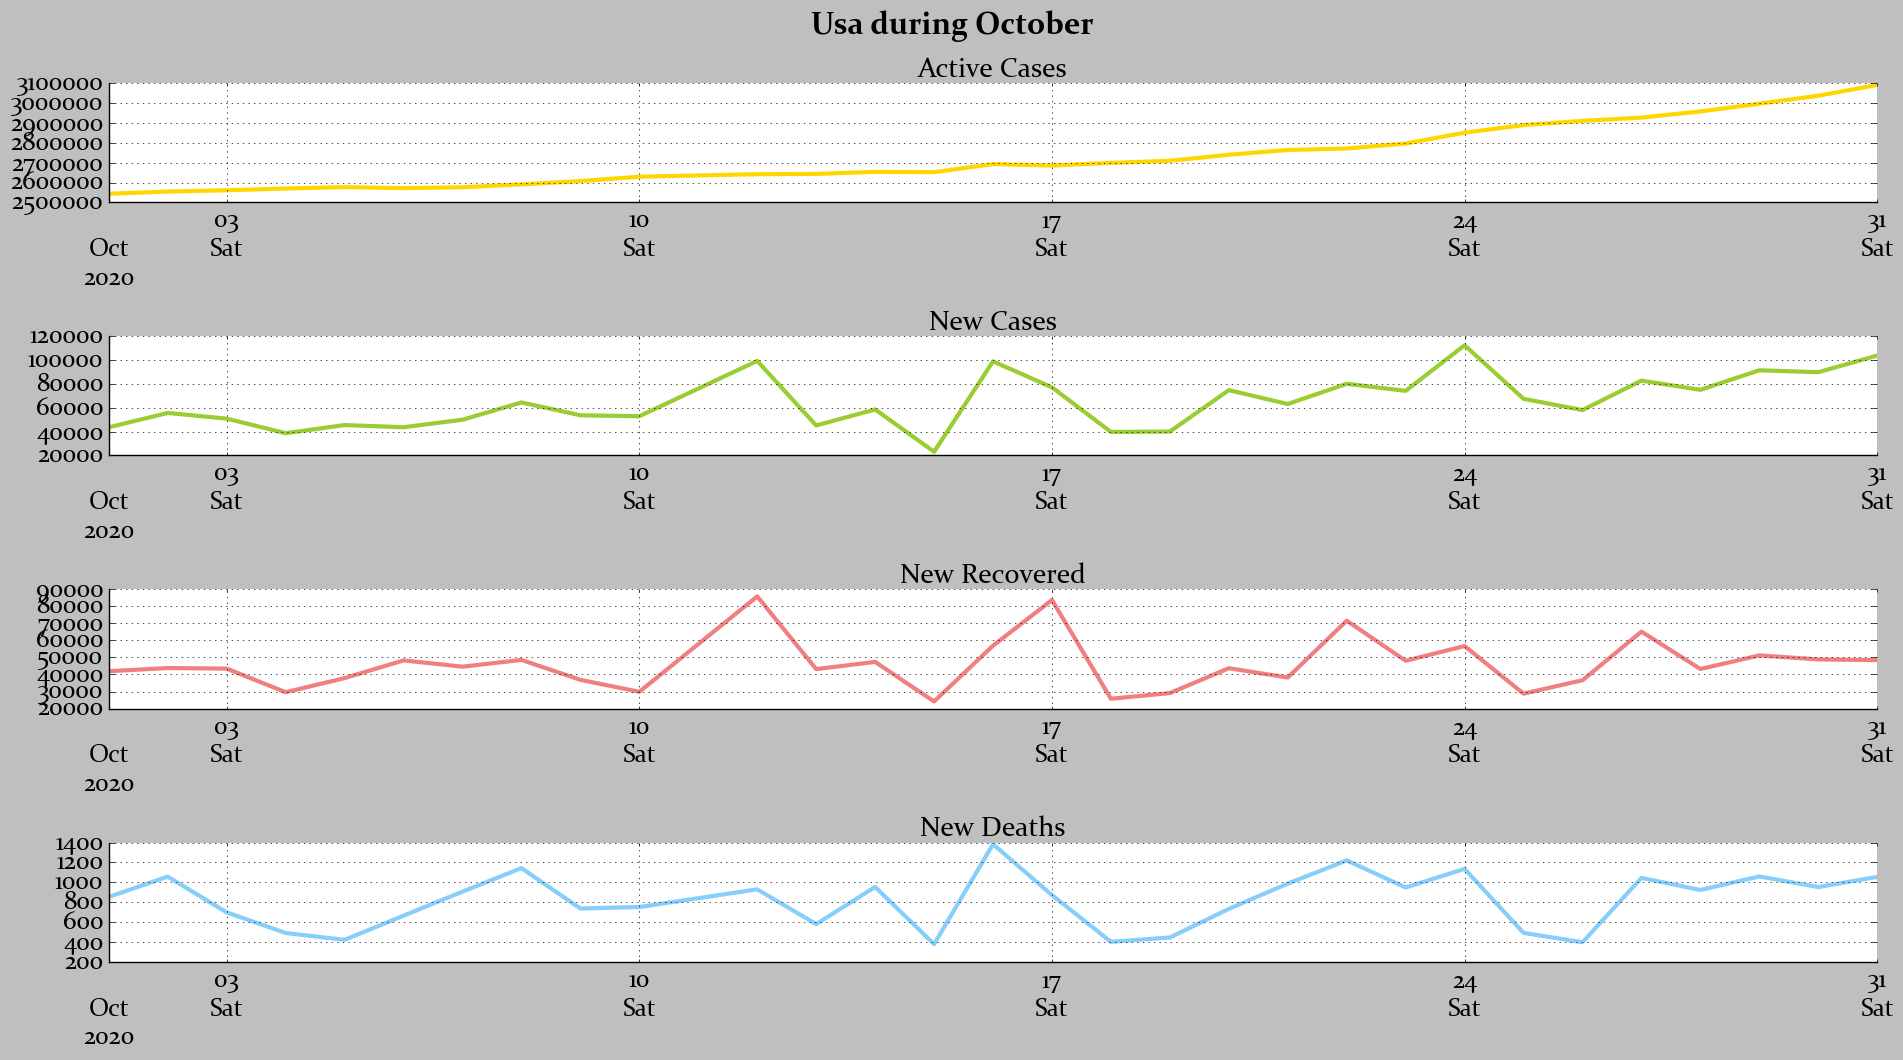

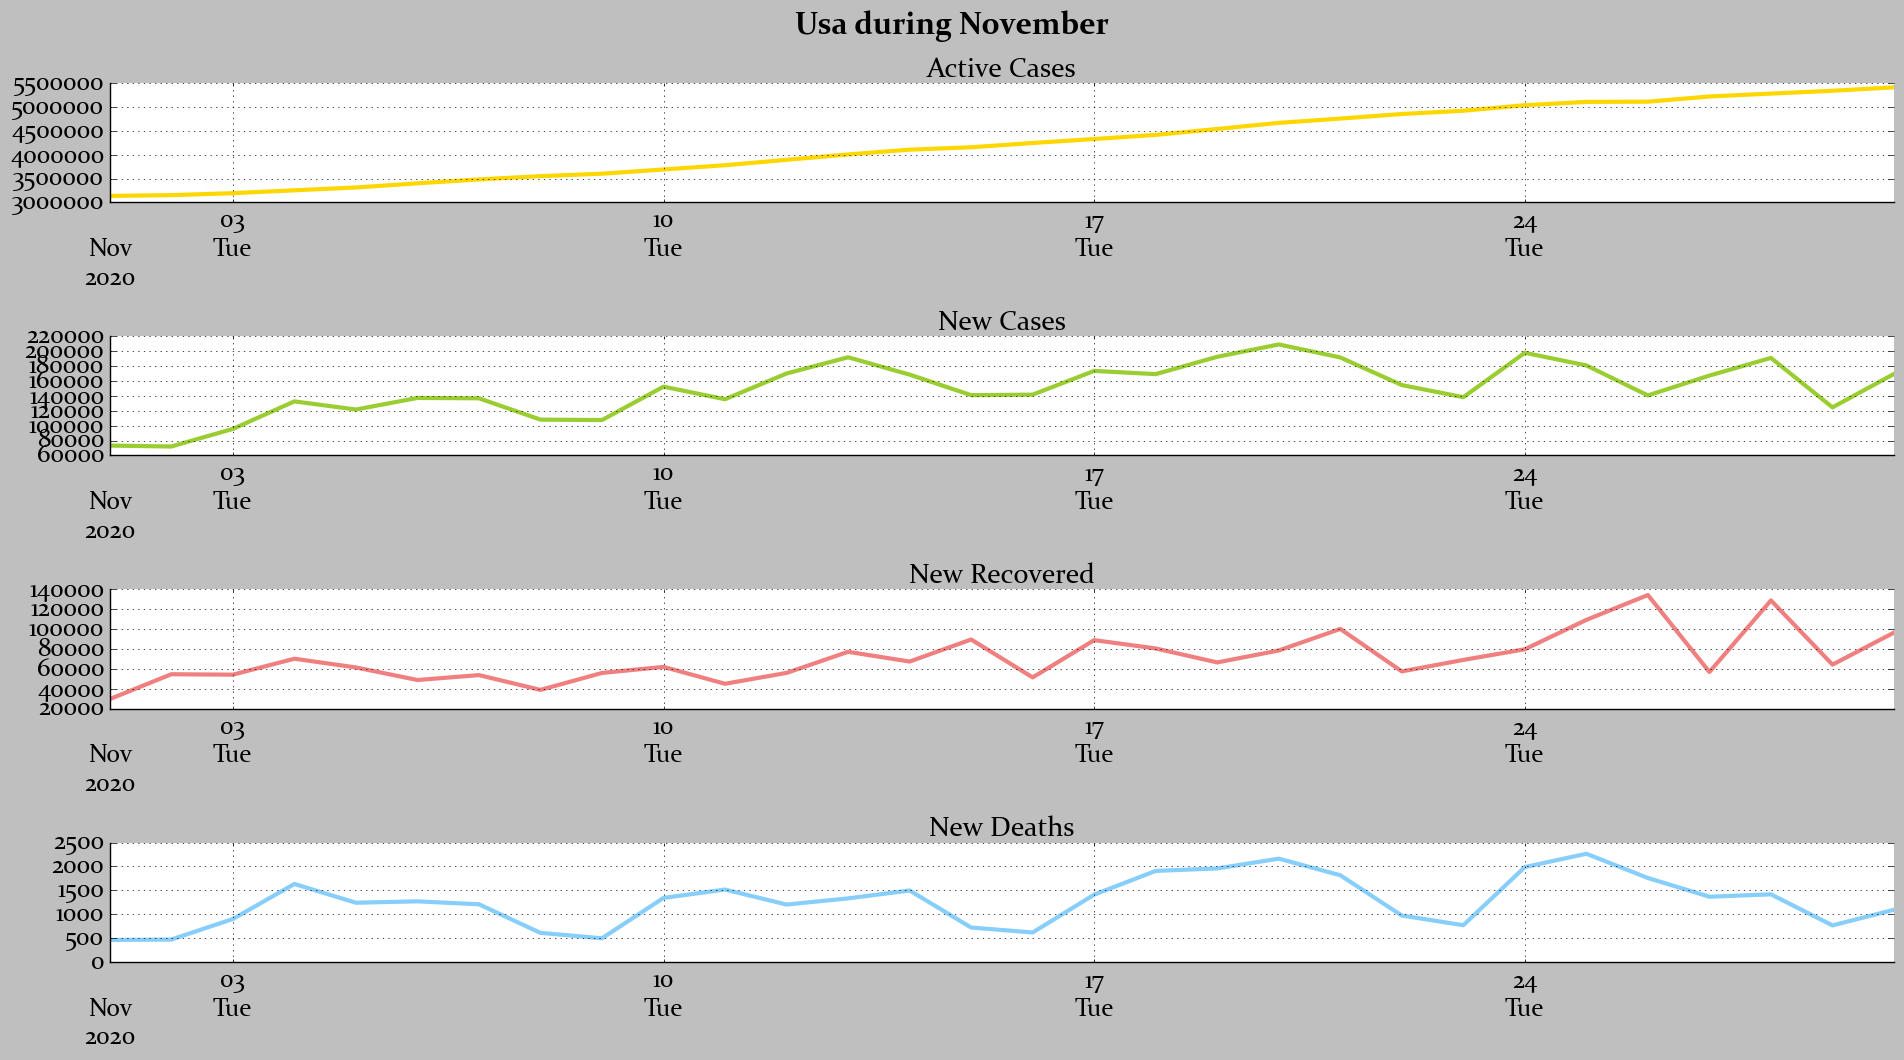

In [9]:
monthName = datetime(1900, date.today().month, 1).strftime('%B')
for month in months_info['Month'].tolist():
    month_num = datetime.strptime(month[:3], "%b").month
    country.monthly_plot(['ActiveCases','NewCases','NewRecovered','NewDeaths'],month_num,date.today().year,save = True)